In [58]:
# import dependencies
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [59]:
# generate list of sp500 indices
tickerlist = ['SPY', 'XLF', 'XLU', 'XLK', 'XLE', 'XLI',
             'XLB', 'XLP', 'XLV', 'XLY', 'XLRE', 'XLC']

# generate list of tickers
tickers = [yf.Ticker(tick) for tick in tickerlist]

# generate list of full names
namelist = [tick.info['longName'] for tick in tickers]

# create dataframe to correspond tickers and full names
name_df = pd.DataFrame({'Ticker': tickerlist,
                       'Full Name': namelist})
name_df

,Ticker,Full Name
0,SPY,SPDR S&P 500 ETF Trust
1,XLF,Financial Select Sector SPDR Fund
2,XLU,Utilities Select Sector SPDR Fund
3,XLK,Technology Select Sector SPDR Fund
4,XLE,Energy Select Sector SPDR Fund
5,XLI,Industrial Select Sector SPDR Fund
6,XLB,Materials Select Sector SPDR Fund
7,XLP,Consumer Staples Select Sector SPDR Fund
8,XLV,Health Care Select Sector SPDR Fund
9,XLY,Consumer Discretionary Select Sector SPDR Fund


In [115]:
# pull price history for each index for each target year
hist20 = [tick.history(start='2020-01-01', end='2020-12-31') for tick in tickers]
hist19 = [tick.history(start='2019-01-01', end='2019-12-31') for tick in tickers]
hist18 = [tick.history(start='2018-01-01', end='2018-12-31') for tick in tickers]
#hist10 = [tick.history(start='2015-01-01', end='2015-12-31') for tick in tickers]

In [116]:
hist18[0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02,251.583697,252.494825,251.170400,252.457245,86655700,0.000,0
2018-01-03,252.635640,254.213695,252.635640,254.054001,90070400,0.000,0
2018-01-04,254.739727,255.641452,254.119782,255.124817,80636400,0.000,0
2018-01-05,255.970240,256.956500,255.444231,256.825012,83524000,0.000,0
2018-01-08,256.721717,257.463776,256.411758,257.294708,57319200,0.000,0
...,...,...,...,...,...,...,...
2018-12-21,236.166664,239.009394,229.696335,230.385483,255345600,1.435,0
2018-12-24,228.796611,230.519480,224.231027,224.298019,147311600,0.000,0
2018-12-26,225.858175,235.630646,223.742871,235.630646,218485400,0.000,0


In [117]:
# adjust columns for both years
# add columns to history dataframes

for df in hist20:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Close'] - df['Open']
    df['Daily Change %'] = round(((df['Daily Change']/df['Open']) * 100), 2)
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df.reset_index(inplace=True)
    
    
# add columns to history dataframes

for df in hist19:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Close'] - df['Open']
    df['Daily Change %'] = round(((df['Daily Change']/df['Open']) * 100), 2)
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df.reset_index(inplace=True)
    
    
for df in hist18:
    df['Amplitude'] = df['High'] - df['Low']
    df['Daily Change'] = df['Close'] - df['Open']
    df['Daily Change %'] = round(((df['Daily Change']/df['Open']) * 100), 2)
    df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
    df.reset_index(inplace=True)

In [87]:
hist20[0]

,Date,Open,High,Low,Close,Volume,Amplitude,Daily Change,Daily Change %
0,2020-01-02,315.539571,316.856194,314.554537,316.836670,59151200,2.301658,1.297099,0.41
1,2020-01-03,313.218410,315.637095,313.159896,314.437500,77709700,2.477200,1.219090,0.39
2,2020-01-06,312.564984,315.724886,312.438194,315.637115,55653900,3.286692,3.072131,0.98
3,2020-01-07,315.032380,315.539541,314.271669,314.749573,40496400,1.267872,-0.282807,-0.09
4,2020-01-08,314.954393,317.724162,314.691080,316.427063,68296000,3.033082,1.472670,0.47
...,...,...,...,...,...,...,...,...,...
247,2020-12-23,365.880720,367.211986,364.827628,365.175354,46201400,2.384358,-0.705366,-0.19
248,2020-12-24,365.682019,366.625842,365.056149,366.596039,26457900,1.569693,0.914020,0.25
249,2020-12-28,369.318170,370.162639,368.652552,369.745392,39000400,1.510087,0.427222,0.12
250,2020-12-29,371.374705,371.563469,368.414108,369.040009,53680500,3.149361,-2.334696,-0.63


In [118]:
# remove year from dates in dataframes to make plotting easier, then add year as new column
for df in hist20:
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df['Year'] = 2020
    
for df in hist19:
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df['Year'] = 2019

for df in hist18:
    df['Date'] = df['Date'].dt.strftime('%m-%d')
    df['Year'] = 2018

In [127]:
hist19[0].describe()

,Open,High,Low,Close,Volume,Amplitude,Daily Change,Daily Change %,Year
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000,251.000000,251.000000,251.0
mean,280.441054,281.595545,279.178506,280.572254,7.009414e+07,2.417039,0.131200,0.052869,2019.0
std,15.961994,15.678006,16.061206,15.777143,2.599969e+07,1.295118,1.569448,0.573663,0.0
min,235.439211,237.918221,233.228188,233.745056,2.027000e+07,0.575407,-5.863867,-2.090000,2019.0
25%,270.902683,272.162054,269.489479,270.556610,5.087125e+07,1.433028,-0.562561,-0.200000,2019.0
50%,281.040228,282.304445,279.747257,280.939331,6.509120e+07,2.029178,0.163445,0.060000,2019.0
75%,289.864643,290.881218,288.942422,290.009872,8.328380e+07,3.057129,0.924644,0.320000,2019.0
max,315.734618,315.793132,314.310729,314.954376,1.787454e+08,8.974515,4.646648,1.940000,2019.0


In [128]:
hist20[0].describe()

,Open,High,Low,Close,Volume,Amplitude,Daily Change,Daily Change %,Year
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.000000,252.000000,252.0
mean,315.743909,318.418682,312.947600,315.758573,1.004460e+08,5.471082,0.014664,0.018571,2020.0
std,32.449141,31.153553,33.426141,32.274122,6.899600e+07,4.000240,3.529185,1.222618,0.0
min,223.856013,225.317704,214.114605,218.715530,2.645790e+07,1.180101,-13.469223,-5.660000,2020.0
25%,297.749653,301.389406,292.844394,297.627731,5.772058e+07,2.727892,-1.668168,-0.530000,2020.0
50%,319.906714,322.265017,318.303069,320.157394,7.576620e+07,4.115804,0.451766,0.135000,2020.0
75%,336.574368,337.980939,333.514945,335.839294,1.140005e+08,6.984687,1.921947,0.632500,2020.0
max,371.374705,375.994389,369.149312,369.745392,3.922207e+08,22.392258,11.458171,4.680000,2020.0


Tried concatenating both years dataframes and grouping by year for plots
Couldn't get it to work quite right

Year
2019    AxesSubplot(0.125,0.125;0.775x0.755)
2020    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

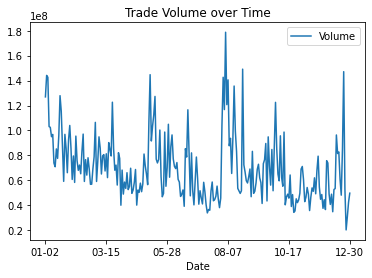

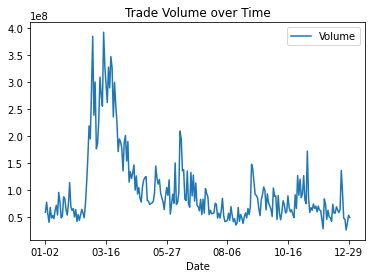

In [130]:
# merge both years' dataframes
hist_concat = []
indexval = np.arange(0,12,1)

for ind in indexval:
    hist = pd.concat([hist19[ind], hist20[ind]])
    hist_concat.append(hist)
    
hist_grouped = [df.groupby(['Year']) for df in hist_concat]

hist_grouped[0].plot.line(x='Date', y='Volume', title='Trade Volume over Time')
#plt.savefig('test_plots/spy_concat_close_line.png')

In [120]:
# create dictionaries
counter = 0
hist20_dict = {}
hist19_dict = {}
hist18_dict = {}

for df in hist20:
    hist20_dict[tickerlist[counter]] = df
    
    counter += 1
    
counter = 0

for df in hist19:
    hist19_dict[tickerlist[counter]] = df
    
    counter += 1
    
counter = 0

for df in hist18:
    hist18_dict[tickerlist[counter]] = df
    
    counter += 1

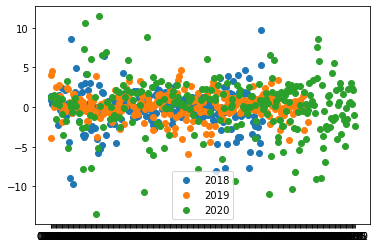

In [122]:
# plot comparing daily change for 2019 and 2020 SPY
plt.figure()

# 2018
plt.scatter(hist18_dict['SPY']['Date'], hist18_dict['SPY']['Daily Change'], label='2018')

# 2019
plt.scatter(hist19_dict['SPY']['Date'], hist19_dict['SPY']['Daily Change'], label='2019')

# 2020
plt.scatter(hist20_dict['SPY']['Date'], hist20_dict['SPY']['Daily Change'], label='2020')

plt.legend()
plt.savefig('test_plots/spy_dailychange_scatter.png')

<AxesSubplot:xlabel='Date', ylabel='Daily Change'>

<Figure size 432x288 with 0 Axes>

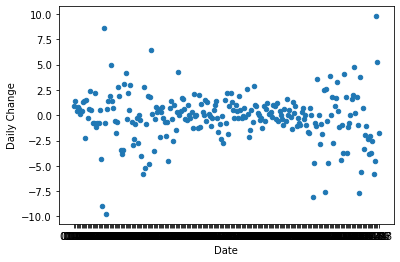

In [123]:
plt.figure()
hist18_dict['SPY'].plot.scatter(x='Date', y='Daily Change')

In [99]:
clist19

[4.020017820919094,
 -3.847723401578321,
 4.594311614526589,
 1.6175821272113353,
 -0.04787491894097684,
 0.3924341054016054,
 2.507722363388183,
 1.244309555941527,
 0.5168680005112378,
 2.421582914829145,
 0.14359553162077532,
 2.823568790417994,
 1.416560139177534,
 -1.8760307118140531,
 -0.5742945423530728,
 0.32542672147835106,
 0.16272799189621878,
 0.354140045182362,
 -0.48815474247518864,
 2.3737077658680334,
 2.316281465482291,
 -0.0861397977111551,
 1.7707290690910327,
 0.6317210391316621,
 -0.04787491188187687,
 -0.7657066867557205,
 1.6462953469229546,
 -0.5551620439285898,
 1.6080014788923336,
 -0.03829408937286871,
 0.5742944658654778,
 0.9667284747363851,
 1.3112877625819124,
 0.574294522401658,
 -0.26800024275024725,
 0.9858902837829646,
 -1.158169951889647,
 0.18186043573365396,
 0.650882504383901,
 -0.2680001273010362,
 -0.019132441382339493,
 -2.1057368756484607,
 -0.4977355239242911,
 -1.7420158996650343,
 -1.7419867561675346,
 1.4548538827139055,
 3.043722690530444

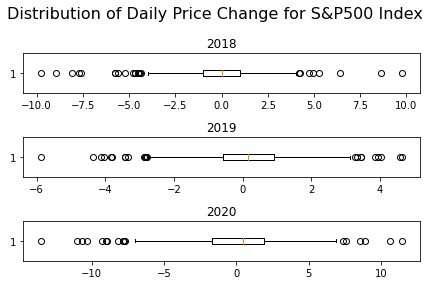

In [124]:
# try boxplots for daily change
fig, axs = plt.subplots(3,1)

clist18 = hist18_dict['SPY']['Daily Change'].tolist()
clist19 = hist19_dict['SPY']['Daily Change'].tolist()
clist20 = hist20_dict['SPY']['Daily Change'].tolist()

axs[0].boxplot(clist18, vert=False)
axs[0].set_title('2018')

axs[1].boxplot(clist19, vert=False)
axs[1].set_title('2019')

axs[2].boxplot(clist20, vert=False)
axs[2].set_title('2020')

fig.suptitle('Distribution of Daily Price Change for S&P500 Index', fontsize=16)
plt.tight_layout()
#plt.savefig('test_plots/spy_dpc_boxplot.png')

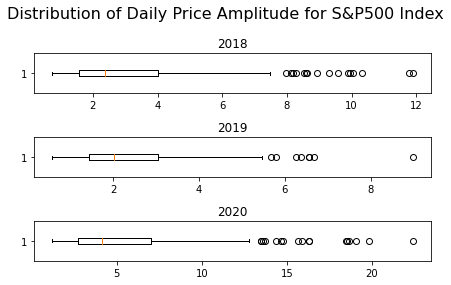

In [126]:
# try boxplot for daily amplitude
fig, axs = plt.subplots(3,1)

# pull data into lists
alist18 = hist18_dict['SPY']['Amplitude'].tolist()
alist19 = hist19_dict['SPY']['Amplitude'].tolist()
alist20 = hist20_dict['SPY']['Amplitude'].tolist()

# generate boxplot for 2019 data
axs[0].boxplot(alist18, vert=False)
axs[0].set_title('2018')

axs[1].boxplot(alist19, vert=False)
axs[1].set_title('2019')

# generate boxplot for 2020 data
axs[2].boxplot(alist20, vert=False)
axs[2].set_title('2020')

fig.suptitle('Distribution of Daily Price Amplitude for S&P500 Index', fontsize=16)
plt.tight_layout()
#plt.savefig('test_plots/spy_amp_boxplot.png')